In [13]:
import numpy as np
import random
import math

import matplotlib.pyplot as plt
import pandas as pd

from scipy.spatial.distance import directed_hausdorff

from scipy.spatial import distance

In [14]:
#Regular Hexagons

Regular=np.empty([10, 6, 2])

d=0

for i in range(0,10):
    
    cp = np.array([d,d])
    a=random.randint(5,15)
    Regular[i][0]= cp + np.array([a,0])
    Regular[i][1]= cp + np.array([a/2,math.sqrt(3)*a/2])
    Regular[i][2]= cp + np.array([-a/2,math.sqrt(3)*a/2])
    Regular[i][3]= cp + np.array([-a,0])
    Regular[i][4]= cp + np.array([-a/2,-math.sqrt(3)*a/2])
    Regular[i][5]= cp + np.array([a/2,-math.sqrt(3)*a/2])
    d=random.randint(d,30+d)

In [15]:
Irregular=np.empty([10, 6, 2])

d=0
for i in range(0,10):
    
    lp = np.array([d,d])
    Irregular[i][0]= lp 
    
    a1=random.randint(5,15)
    a2=random.randint(5,15)
    Irregular[i][1]= Irregular[i][0] + np.array([a1,a2])
    
    a1=random.randint(5,15)
    a2=random.randint(5,15)
    Irregular[i][2]= Irregular[i][1] + np.array([a1,a2])
    
    a1=random.randint(5,15)
    a2=random.randint(5,15)
    Irregular[i][3]= Irregular[i][2] + np.array([a1,-a2])
    
    a1=random.randint(5,15)
    a2=random.randint(5,15)
    Irregular[i][4]= Irregular[i][3] + np.array([-a1,-a2])
    
    a1=random.randint(5,15)
    a2=random.randint(5,15)
    Irregular[i][5]= Irregular[i][4] + np.array([-a1,-a2])
    
    d=random.randint(d,30+d)
    

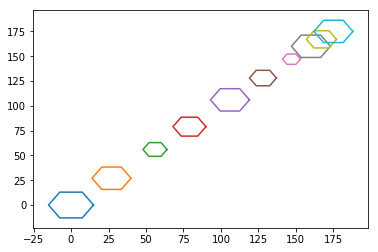

In [16]:
for i in range(0,10):
    cord=Regular[i].tolist()
    cord.append(cord[0]) 

    xs, ys = zip(*cord) 

    plt.plot(xs,ys) 
plt.show() 

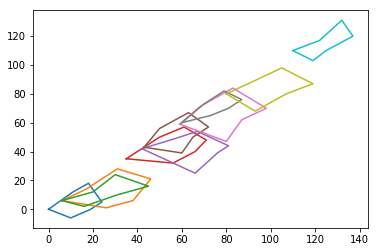

In [17]:
for i in range(0,10):
    Icord=Irregular[i].tolist()
    Icord.append(Icord[0])

    xs, ys = zip(*Icord)

    plt.plot(xs,ys) 
plt.show()

In [18]:
Regular_CP=[]
for i in range(0,10):
    Regular_CP.append(np.mean(Regular[i],axis=0))
Regular_CP = np.array(Regular_CP)

In [19]:
Irregular_CP=[]
for i in range(0,10):
    Irregular_CP.append(np.mean(Irregular[i],axis=0))
Irregular_CP = np.array(Irregular_CP)

## Mahalanobis distance

In [20]:
MD=[]
for i in range(0,10):
    MD_i=[]
    covar = np.cov(Regular[i], rowvar=0)
    invcovar = np.linalg.inv(covar)
    for j in range(0,10):
        x = distance.mahalanobis(np.array(Regular_CP[i]),np.array(Regular_CP[j]),invcovar)
        MD_i.append(x)
    MD.append(MD_i)
df = pd.DataFrame(MD,columns=range(1,11))
df.index = range(1,11)
print("Mahalanobis distance between regular hexagons")
df

Mahalanobis distance between regular hexagons


,1,2,3,4,5,6,7,8,9,10
1,0.000000,3.286335,6.816103,9.615574,12.901909,15.579664,17.892270,19.474580,20.326593,21.300322
2,3.791925,0.000000,4.072809,7.302967,11.094893,14.184610,16.853002,18.678744,19.661835,20.785369
3,12.780193,6.618314,0.000000,5.249008,11.410887,16.431677,20.767814,23.734644,25.332168,27.157910
4,13.112146,8.630780,3.817460,0.000000,4.481366,8.132850,11.286404,13.444099,14.605935,15.933747
5,14.886818,11.094893,7.022084,3.791925,0.000000,3.089717,5.758109,7.583851,8.566943,9.690476
6,25.966106,20.488881,14.605935,9.940150,4.462925,0.000000,3.854344,6.491527,7.911548,9.534430
7,44.730676,36.514837,27.690418,20.691741,12.475903,5.781516,0.000000,3.955774,6.085806,8.520129
8,22.470669,18.678744,14.605935,11.375776,7.583851,4.494134,1.825742,0.000000,0.983092,2.106625
9,30.489889,25.560386,20.265735,16.066528,11.137025,7.120393,3.651484,1.278019,0.000000,1.460593
10,24.577294,20.785369,16.712560,13.482401,9.690476,6.600759,3.932367,2.106625,1.123533,0.000000


In [21]:
MD=[]
for i in range(0,10):
    MD_i=[]
    covar = np.cov(Irregular[i], rowvar=0)
    invcovar = np.linalg.inv(covar)
    for j in range(0,10):
        x = distance.mahalanobis(np.array(Irregular_CP[i]),np.array(Irregular_CP[j]),invcovar)
        MD_i.append(x)
    MD.append(MD_i)
df = pd.DataFrame(MD,columns=range(1,11))
df.index = range(1,11)
print("Mahalanobis distance between Irregular hexagons")
df

Mahalanobis distance between Irregular hexagons


,1,2,3,4,5,6,7,8,9,10
1,0.000000,1.655648,1.349107,5.838357,6.494536,6.563741,9.006469,9.064219,11.784959,15.710309
2,1.040695,0.000000,0.187114,3.151580,3.292877,3.895090,5.421110,5.791386,7.365921,10.429463
3,0.940896,0.195968,0.000000,4.149636,3.988073,5.305910,6.974164,7.804129,9.338433,13.452112
4,4.474479,3.411680,3.571638,0.000000,0.784742,0.883569,2.466850,2.869058,4.587787,7.879755
5,5.444020,4.151833,4.363290,0.606549,0.000000,1.051871,2.633675,3.046502,5.039439,8.762013
6,5.353741,4.182021,4.365857,0.823558,1.402503,0.000000,2.024029,2.059764,4.247879,7.432459
7,6.140013,5.118930,5.287658,2.169107,1.970294,1.662311,0.000000,0.593450,1.888089,4.660929
8,8.456285,7.441992,7.560531,3.563061,4.280683,2.420976,1.508187,0.000000,2.618161,5.871569
9,8.569760,7.548352,7.707574,4.337746,4.217027,3.696372,2.008174,1.924052,0.000000,3.136611
10,12.486682,11.272758,11.474408,7.869661,7.632331,7.278578,5.368306,5.333302,3.249937,0.000000


In [22]:
MD=[]
for i in range(0,10):
    MD_i=[]
    covar = np.cov(Regular[i], rowvar=0)
    invcovar = np.linalg.inv(covar)
    for j in range(0,10):
        x = distance.mahalanobis(np.array(Regular_CP[i]),np.array(Irregular_CP[j]),invcovar)
        MD_i.append(x)
    MD.append(MD_i)
df = pd.DataFrame(MD,columns=range(1,11))
df.index = range(1,11)
print("Mahalanobis distance between regular & Irregular hexagons")
df

Mahalanobis distance between regular & Irregular hexagons


,1,2,3,4,5,6,7,8,9,10
1,1.247632,2.592804,2.348452,6.145777,6.656319,6.757910,8.843332,8.888611,11.208949,14.575658
2,2.568852,1.423789,1.540241,3.364784,4.047778,4.019628,6.438612,6.466421,9.161316,13.029598
3,10.716686,8.384565,8.760741,1.991918,2.648648,0.791027,4.040628,3.906458,8.356435,14.566111
4,11.600049,9.867968,10.154379,4.916233,4.631591,3.955145,1.584523,1.049728,2.490954,6.790911
5,13.601883,12.121816,12.369193,7.904568,7.543032,7.120195,4.824614,4.643079,2.289398,2.020739
6,24.106306,21.959351,22.319796,15.859699,15.286959,14.740574,11.377315,11.164686,7.527005,1.921231
7,41.937530,38.709241,39.252598,29.555368,28.659389,27.887307,22.815292,22.525705,16.983751,8.429232
8,21.180668,19.688791,19.940219,15.463163,15.041491,14.695695,12.349400,12.221654,9.649413,5.699628
9,28.812364,26.871781,27.199026,21.378089,20.825221,20.381784,17.328659,17.165858,13.814529,8.680811
10,23.286471,21.792810,22.044846,17.566637,17.137738,16.801338,14.450582,14.327805,11.744516,7.796762


In [23]:
MD=[]
for i in range(0,10):
    MD_i=[]
    covar = np.cov(Irregular[i], rowvar=0)
    invcovar = np.linalg.inv(covar)
    for j in range(0,10):
        x = distance.mahalanobis(np.array(Irregular_CP[i]),np.array(Regular_CP[j]),invcovar)
        MD_i.append(x)
    MD.append(MD_i)
df = pd.DataFrame(MD,columns=range(1,11))
df.index = range(1,11)
print("Mahalanobis distance between Irregular & regular hexagons")
df

Mahalanobis distance between Irregular & regular hexagons


,1,2,3,4,5,6,7,8,9,10
1,1.608078,2.640392,6.675039,9.928472,13.759174,16.884101,19.584225,21.432132,22.427274,23.564661
2,1.972343,1.515013,4.223497,6.547737,9.306234,11.562638,13.514409,14.850853,15.570733,16.393633
3,1.872320,2.416344,5.969687,8.908988,12.385330,15.225989,17.682226,19.363814,20.269539,21.304833
4,5.370682,2.472438,1.409547,3.695434,6.649881,9.088076,11.201114,12.648932,13.428995,14.320808
5,6.524468,3.211189,1.489628,3.918686,7.269898,10.051331,12.464936,14.119497,15.011124,16.030599
6,6.419221,3.319755,0.600383,2.816364,5.908458,8.446118,10.641198,12.143994,12.953389,13.878542
7,7.030918,4.422017,1.720445,1.101318,3.470692,5.582139,7.423117,8.686448,9.367448,10.146200
8,9.284061,5.809102,2.118742,1.107330,4.461396,7.286721,9.733983,11.409929,12.312661,13.344541
9,9.408209,6.589136,3.615581,1.526962,2.182657,4.330886,6.286523,7.639509,8.370631,9.207715
10,13.612958,10.573654,7.322100,4.770424,1.948692,1.460708,3.264685,4.670147,5.441092,6.328410


## Hausdorff distance

In [24]:
HD=[]
for i in range(0,10):
    HD_i=[]
    for j in range(0,10):
        HD_i.append(directed_hausdorff(Regular[i], Regular[j])[0])
    HD.append(HD_i)
df = pd.DataFrame(HD, columns=range(1,11))
df.index = range(1,11)
print("Hausdorff distance between regular hexagons")
df

Hausdorff distance between regular hexagons


,1,2,3,4,5,6,7,8,9,10
1,0.000000,40.118957,85.976531,115.591211,151.839372,186.821345,216.595252,228.206609,241.006768,249.419762
2,36.255610,0.000000,45.860085,75.472732,111.722871,146.702926,176.476408,188.090404,200.889177,209.303607
3,72.457133,36.205699,0.000000,29.639307,65.893758,100.857783,130.626311,142.254468,155.046718,163.466907
4,107.864137,71.609125,35.433198,0.000000,36.255610,71.230197,101.004442,112.620637,125.416986,133.833651
5,147.975691,111.722871,75.551391,40.118957,0.000000,34.991720,64.769581,76.367532,89.168185,97.580736
6,175.230662,138.975723,102.789628,67.366602,27.268655,0.000000,29.777960,41.404076,54.189021,62.612894
7,199.209680,162.954218,126.762639,91.346060,51.253306,23.984852,0.000000,12.620753,24.442503,32.886442
8,224.342916,188.090404,151.913352,116.484300,76.367532,49.129446,25.211438,0.000000,12.820806,21.213203
9,231.347655,195.093666,158.910400,123.485139,83.372866,56.120852,32.164640,10.600616,0.000000,10.021773
10,245.556067,209.303607,173.125880,137.697327,97.580736,70.339360,46.394848,21.213203,14.232681,0.000000


In [25]:
HD=[]
for i in range(0,10):
    HD_i=[]
    for j in range(0,10):
        HD_i.append(directed_hausdorff(Irregular[i], Irregular[j])[0])
    HD.append(HD_i)
df = pd.DataFrame(HD, columns=range(1,11))
df.index = range(1,11)
print("Hausdorff distance between Irregular hexagons")
df

Hausdorff distance between Irregular hexagons


,1,2,3,4,5,6,7,8,9,10
1,0.000000,12.649111,10.000000,49.497475,59.396970,60.811183,83.438600,84.852814,113.137085,155.563492
2,27.202941,0.000000,10.049876,41.012193,50.911688,52.325902,74.953319,76.367532,104.651804,147.078210
3,23.706539,10.049876,0.000000,41.012193,50.911688,52.325902,74.953319,76.367532,104.651804,147.078210
4,60.901560,39.000000,44.011362,0.000000,12.206556,11.313708,33.941125,35.355339,63.639610,106.066017
5,68.154237,41.880783,45.607017,12.206556,0.000000,15.811388,26.076810,35.510562,53.740115,96.166522
6,66.610810,49.040799,54.083269,10.198039,13.601471,0.000000,22.627417,24.041631,52.325902,94.752309
7,95.414884,73.061618,77.897368,34.828150,34.000000,29.068884,0.000000,19.313208,29.698485,72.124892
8,90.138782,69.354164,74.242845,32.202484,30.463092,24.207437,10.000000,0.000000,28.284271,70.710678
9,122.319254,98.412398,102.552426,61.846584,58.137767,55.758407,27.018512,33.837849,0.000000,43.600459
10,160.514797,139.628077,144.201248,102.552426,100.767058,94.111636,67.896981,71.063352,42.638011,0.000000


In [26]:
HD=[]
for i in range(0,10):
    HD_i=[]
    for j in range(0,10):
        HD_i.append(directed_hausdorff(Regular[i], Irregular[j])[0])
    HD.append(HD_i)
df = pd.DataFrame(HD, columns=range(1,11))
df.index = range(1,11)
print("Hausdorff distance between Regular & Irregular hexagons")
df

Hausdorff distance between Regular & Irregular hexagons


,1,2,3,4,5,6,7,8,9,10
1,15.000000,23.299884,23.299884,64.104030,73.987783,75.400085,98.004413,99.417532,127.685007,170.096690
2,25.507841,14.679351,17.133300,24.106706,33.937441,35.344965,57.909698,59.321580,87.575014,129.980317
3,61.502386,44.203781,49.146770,10.776994,14.798474,7.211103,12.147807,13.543472,41.719944,84.120425
4,96.934030,77.730614,82.585175,39.321194,38.708061,30.424180,10.523175,8.534771,12.371441,54.540162
5,137.049138,116.995368,121.694287,79.267373,77.922181,70.541830,44.456344,48.502575,20.667203,18.522058
6,164.273340,143.735747,148.347252,106.399156,104.788100,97.790060,71.644205,75.137206,46.740279,11.401754
7,188.235510,167.416936,171.972067,130.320019,128.325397,121.767748,95.601858,98.867860,70.443047,27.807856
8,213.401888,192.607933,197.148165,155.515967,153.313185,146.908303,120.773615,124.074169,95.650577,53.018706
9,220.392277,199.488832,204.010776,162.484633,160.048188,153.909229,127.759940,130.985366,102.567612,59.954468
10,234.612693,213.706728,218.220414,176.714363,174.177158,168.121383,141.982450,145.214150,116.798043,74.187149


In [27]:
HD=[]
for i in range(0,10):
    HD_i=[]
    for j in range(0,10):
        HD_i.append(directed_hausdorff(Irregular[i], Regular[j])[0])
    HD.append(HD_i)
df = pd.DataFrame(HD, columns=range(1,11))
df.index = range(1,11)
print("Hausdorff distance between Irregular & Regular hexagons")
df

Hausdorff distance between Irregular & Regular hexagons


,1,2,3,4,5,6,7,8,9,10
1,15.000000,25.846666,71.498540,101.137767,137.390808,172.341746,202.099805,213.743618,226.529193,234.954431
2,37.443290,17.468547,63.017297,92.656156,128.908238,163.857280,193.614785,205.259432,218.044487,226.470052
3,34.000000,17.468547,63.017297,92.656156,128.908238,163.857280,193.614785,205.259432,218.044487,226.470052
4,72.511540,37.443290,22.068427,51.678694,87.916535,122.850614,152.604266,164.254125,177.035852,185.463386
5,79.322128,44.384682,24.808293,45.101683,78.025212,112.953055,142.705319,154.356840,167.137478,175.565612
6,78.083907,42.819390,10.856644,40.386977,76.612338,111.539146,141.291190,152.942966,165.723435,174.151660
7,106.959556,71.887298,36.769553,22.919819,54.015895,88.917920,118.665400,130.321975,143.099214,151.529097
8,101.441915,65.472770,29.997864,16.492464,52.604502,87.504199,117.251309,128.908238,141.685234,150.115236
9,133.827029,98.417480,63.134776,30.083218,27.520300,60.462324,89.710690,100.893346,113.676162,121.929149
10,171.541599,135.289568,99.084658,63.720224,23.855471,17.784504,46.556253,58.250897,70.998106,79.438134
